<a href="https://colab.research.google.com/github/Anisha-Tasneem/CSE499/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/499B-datasets/11DatasetNew.csv')
data.head()

,Customer ID,Gender,Age,City Code,Product Code,Product Price (Taka),Delivery Charge(Taka),Total Bill (Taka),Spending Score,Customer Value
0,1,Female,19,3.0,9,9000,120,9120,90,1
1,2,Female,27,4.0,2,5990,120,6110,48,0
2,3,Female,34,2.0,4,6890,120,7010,53,0
3,4,Female,42,2.0,6,10590,120,10710,95,1
4,5,Female,33,16.0,8,7500,120,7620,78,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/drive/MyDrive/499B-datasets/DatasetNew.csv')

# Defining categorical and numerical columns
categorical_cols = ['Gender', 'City Code', 'Product Code']
numerical_cols = [ 'Product Price (Taka)', 'Delivery Charge(Taka)', 'Total Bill (Taka)', 'Spending Score']

# Droping columns that are not used for modeling
data.drop(['Customer ID'], axis=1, inplace=True)

# Handling missing values
# For numerical columns, imputing missing values with the mean
# For categorical columns, impute missing values with a constant ('missing')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', SimpleImputer(strategy='constant', fill_value='missing'), categorical_cols)
    ])

processed_data = preprocessor.fit_transform(data)

# Converting processed data back to DataFrame
processed_df = pd.DataFrame(processed_data, columns=numerical_cols + categorical_cols)

# Handling categorical encoding
processed_df = pd.get_dummies(processed_df, columns=categorical_cols)

# Standardizing numerical features
scaler = StandardScaler()
processed_df[numerical_cols] = scaler.fit_transform(processed_df[numerical_cols])

<ipython-input-8-d8925aef6192>:31: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  processed_df = pd.get_dummies(processed_df, columns=categorical_cols)


In [ ]:
processed_df.head()

,Product Price (Taka),Delivery Charge(Taka),Total Bill (Taka),Spending Score,Gender_Female,Gender_Male,City Code_1.0,City Code_2.0,City Code_3.0,City Code_4.0,...,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10
0,0.853279,0.731865,0.864120,1.103443,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.047863,0.731865,-1.036639,-0.865049,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,-0.479415,0.731865,-0.468305,-0.630705,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.857537,0.731865,1.868176,1.337788,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.094134,0.731865,-0.083102,0.541017,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Extracting the categorical columns
categorical_cols = ['Gender', 'City Code', 'Product Code']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = encoder.fit_transform(data[categorical_cols])

# Dropping columns not suitable for modeling
data_processed = data.drop(columns=['Gender', 'City Code', 'Delivery Charge(Taka)'])

#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_processed['Customer Value'])

#Droping original 'Customer Value' column from the processed data
data_processed.drop(columns=['Customer Value'], inplace=True)

#Concatenating encoded categorical variables with remaining numerical variables
X = np.concatenate((data_processed.values, X_encoded), axis=1)
y = y_encoded

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Training random forest model
rf_classifier.fit(X_train, y_train)

#Predicting on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00       178
           5       1.00      1.00      1.00       109

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



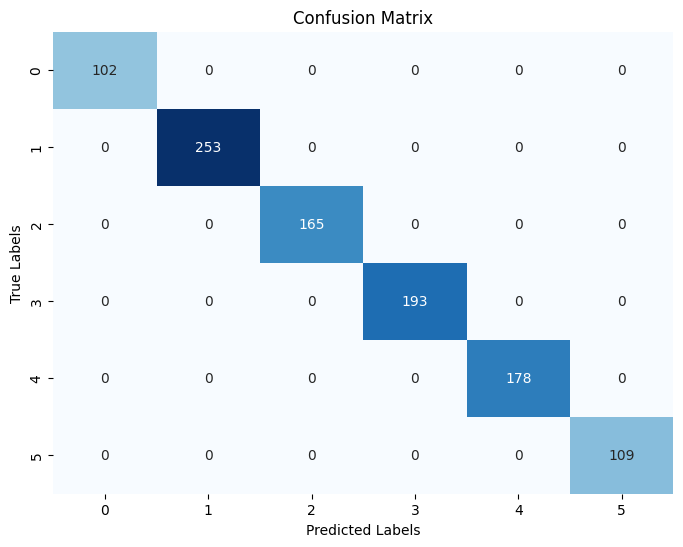

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

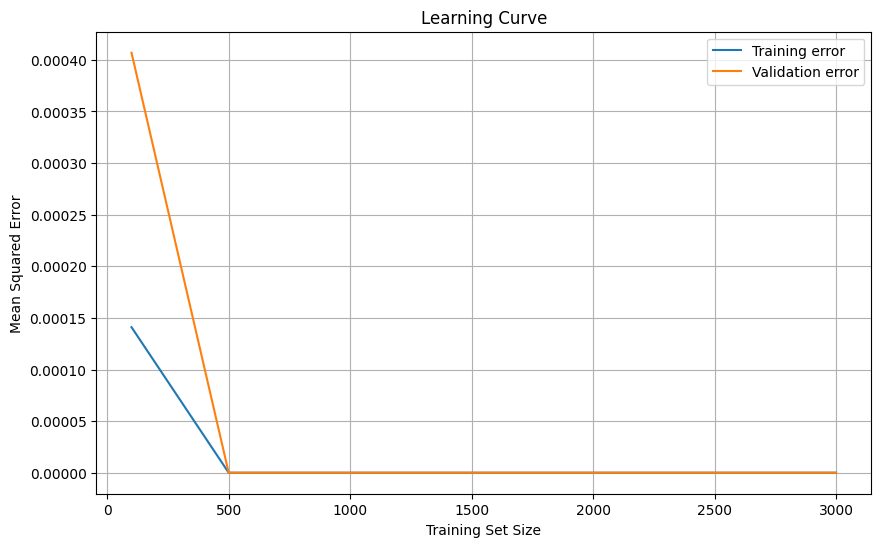

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor


def plot_learning_curve(estimator, X, y, train_sizes, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error')

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')

    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define different training set sizes
train_sizes = [100, 500, 1000, 1500, 2000, 2500, 3000]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Plot the learning curve
plot_learning_curve(rf_regressor, X_train, y_train, train_sizes)